# AST4930 Homework Assignment #5 (20 pts)

### Instruction:

In this homework, we will use a dimensionality reduction algorithm PCA to classify SDSS spectra. Below you will find instruction to this homework assignment.

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Let's read in SDSS spectra.

In [1]:
import numpy as np

data = np.load('/blue/ast4930/share/spec4000_corrected.npz')

### The data contains the wavelengths, 4000 spectra (X), classification in integer (y), classification in string (labels), and redshift (z).

In [2]:
wavelengths = data['wavelengths']
X = data['X']
y = data['y']
labels = data['labels'].astype('str')
z = data['z']

### Let's check what classes we have.

In [3]:
labels

array(['unknown', 'star', 'absorption galaxy', 'galaxy',
       'emission galaxy', 'narrow-line QSO', 'broad-line QSO', 'sky',
       'Hi-z QSO', 'Late-type star'], dtype='<U17')

In [4]:
X.shape

(4000, 1000)

### We will use only 'absorption galaxy', 'galaxy', 'emission galaxy', 'narrow-line QSO', 'broad-line QSO' for this homework problem.

In [5]:
np.where(y==2)[0].shape, np.where(y==3)[0].shape, np.where(y==4)[0].shape, np.where(y==5)[0].shape, np.where(y==6)[0].shape

((1191,), (1304,), (1299,), (156,), (20,))

### Here's a plot showing an example spectrum from each class to have a sense of what kind of spectra are in the data set.


Text(0.5, 1.0, 'Example Spectra')

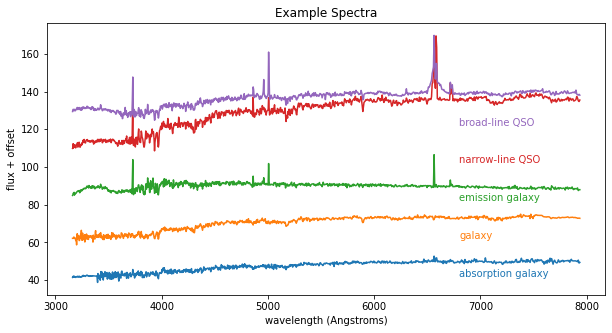

In [6]:
import matplotlib.pyplot as plt
import numpy as np
   
plt.figure(figsize=(10,5))
for i_class in (2, 3, 4, 5, 6):
    i = np.where(y == i_class)[0][0]
    l = plt.plot(wavelengths, X[i] + 20 * i_class)
    c = l[0].get_color()
    plt.text(6800, 2 + 20 * i_class, labels[i_class], color=c)

plt.subplots_adjust(hspace=0)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Example Spectra')

### TODO: Let's standardize the data and make a similar plot showing the averaged spectrum of each class.

Text(0.5, 1.0, 'Example Spectra')

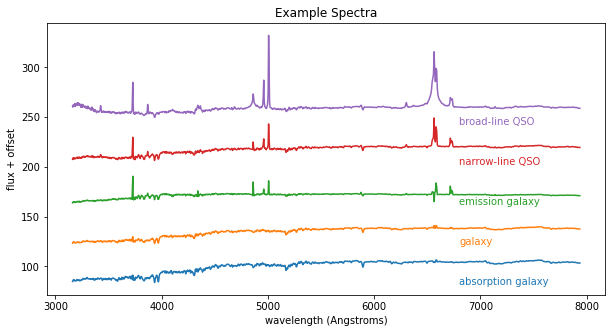

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
   
plt.figure(figsize=(10,5))
for i_class in (2, 3, 4, 5, 6):
    i = np.where(y == i_class)[0]
    X_avg = np.sum(X[i], axis=0)/len(i)
    l = plt.plot(wavelengths, X_avg + 40 * i_class)
    c = l[0].get_color()
    plt.text(6800, 2 + 40 * i_class, labels[i_class], color=c)

plt.subplots_adjust(hspace=0)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Example Spectra')

### Q: Can you point out some specific features for each class?  Do they relate to their classification?

The broad line spectra has very large peaks across its spectra and the peak to the right is pretty wide/borad.
The narrow line spectra has peaks in the same areas but the peaks are shorter and more narrow than the borad line. 
The emission galaxy spectra shows peaks in the areas where the borad and narrow spectra peak but the peaks are far less pronounced.

### TODO: (1) Split the data, (2) train a model using a ML algorithm of your preference, and (3) record the time it took for your code to run. Write why you chose that specific algorithm. There can be more than one answer, so try to justify your choice.

### Tip: Don't forget to apply feature scaling, CV, hyperparameter optimization as needed!

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time 

tstart = time.time()


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.5)

param_grid = {'n_estimators': [10, 50, 100, 200],
             'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0),param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=2)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f"Elapsed time:{time.time()-tstart:.2f} seconds")
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/odonnells/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters: {'criterion': 'entropy', 'n_estimators': 200}
Best model: RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)
Test score: 0.69
Elapsed time:195.75 seconds
Test score: 0.69


### Q: What is the performance of your model? Any comments/thoughts?

Best parameters, entropy w/ 500 estimators. Running this took 22 minuites to cross validate and the best score was 71%

I reduced the data size to 5% to reduce run time and got a score of 64%, run time of 39.27 seconds, with hyperparameters of n_estimators = 50 and gini

In my final run, as shown by the code above, I got a score of 69% runtime 191.56 seconds, 200 estimators, entropy, using 50% of the data

### TODO: Now, let's apply the PCA using n_components=0.99.

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import time 

tstart = time.time()

X_scaled = StandardScaler().fit(X_train).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99)),
    ('model', RandomForestClassifier(random_state=0))
])

param_grid = {'model__n_estimators': [10, 50, 100, 200],
             'model__criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=1, n_jobs=2)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print(f"Elapsed time:{time.time()-tstart:.2f} seconds")

# param grid 
# model random
# pipeline standard scalar, model and pca 

## best estimator 
## pick out pca = fit_model['pca']
## 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'model__criterion': 'entropy', 'model__n_estimators': 200}
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.99)),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=200,
                                        random_state=0))])
Test score: 0.69
Elapsed time:49.12 seconds


In [25]:
fit_model = grid_search.best_estimator_
pca = fit_model['pca']

In [26]:
X.shape

(4000, 1000)

In [27]:
pca.n_components_

5

### Q: How many principal components did you end up with? How does that number compare with the dimension of the original data?

5 by 1000, the orignal was 4000 by 1000. We have reduced it significantly 

### Q: What is the performance of your model and how long did it take to run?

I acheived a score of 69% this time in 44.53 seconds

### Q: How do these numbers compare with the ones before you applied the PCA?

Before pca I had a similar score but it took longer to run 

### TODO: Make a plot showing the PCA-ed data.

In [28]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)

print(X_train_pca)
print(X_train_pca.shape)

[[-13.9021      -4.1138253    7.875228    -1.2417262    0.05512672]
 [-18.313025     1.8343304    2.6673286    0.15297897   0.15210594]
 [ -6.270211    -0.9880659   -3.1603649   -0.19582334   0.04056674]
 ...
 [-14.578531     1.3525853    2.5956504    0.23443273  -0.31739283]
 [-12.685132    -1.4415822   -4.4174523   -0.58367336   1.1518203 ]
 [-16.661093    -0.6176663   -1.0162357   -0.8218996   -0.08016204]]
(3000, 5)


Text(0.5, 1.0, 'Example Spectra')

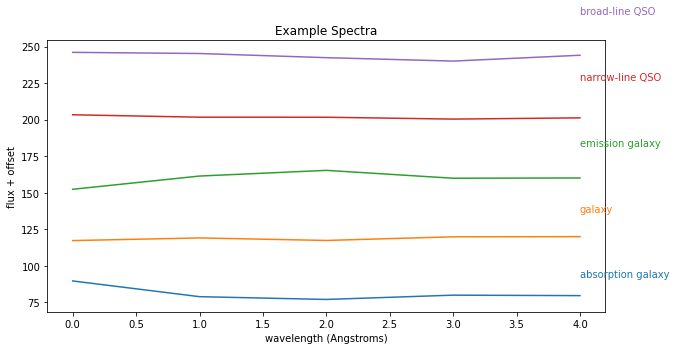

In [29]:
plt.figure(figsize=(10,5))
for i_class in (2, 3, 4, 5, 6):
    i = np.where(y_train == i_class)[0]
    X_pca_avg = np.sum(X_train_pca[i], axis=0)/len(i)
    l = plt.plot(X_pca_avg + 40 * i_class)
    c = l[0].get_color()
    plt.text(4, 2 + 45 * i_class, labels[i_class], color=c)

plt.subplots_adjust(hspace=0)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Example Spectra')

### Q: How do they look and what do they mean?

The pca lines look similar to the spectral lines but without any noise. They show the directions of the data with the greatest varience for each spectra. 

### TODO: Make a plot of the inverse PCA-ed spectra for each class.

Text(0.5, 1.0, 'Example Spectra')

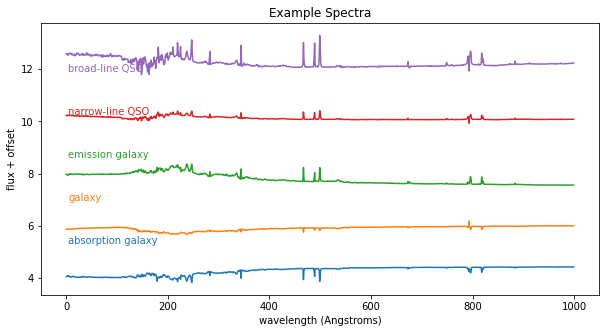

In [48]:
X_inverse = pca.inverse_transform(X_train_pca)

plt.figure(figsize=(10,5))
for i_class in (2, 3, 4, 5, 6):
    i = np.where(y_train == i_class)[0]
    X_inverse_avg = np.sum(X_inverse[i], axis=0)/len(i)
    l = plt.plot(X_inverse_avg + 2 * i_class)
    c = l[0].get_color()
    plt.text(4, 2 + 1.649 * i_class, labels[i_class], color=c)

plt.subplots_adjust(hspace=0)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.title('Example Spectra')

### Q: How do they look compared with the original spectra?

This graph looks similar to our original data but more clean. It looks more comprable to our averaged spectra.

### Q: What did you learn about PCA?

PCA is a nice way to scale down our data and reduce run time. Before we had 4000 components whereas we ended up with five and it didn't affect our score at the end